In [11]:
pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import statsmodels.api as sm

In [13]:
import numpy as np

In [14]:
np.random.seed(12345)

In [15]:
arparams = np.array([.75, -.25])

In [16]:
maparams = np.array([.65, .35])

In [17]:
ar = np.r_[1, -arparams]
ma = np.r_[1,maparams]

In [18]:
arma_process = sm.tsa.ArmaProcess(ar,ma)
arma_process.isstationary

True

In [19]:
arma_process.isinvertible

True

In [20]:
arma_process.arroots

array([1.5-1.32287566j, 1.5+1.32287566j])

In [ ]:
model.params

## AR-자기회귀모형

In [30]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples (ar,ma,nobs):
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples
# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs,drift): 
    init = np.random.normal(size=1, loc = 0) 
    e = np.random.normal(size=nobs, scale =1) 
    y = np.zeros(nobs) 
    y[0] = init
    for t in (1,nobs): 
        y[t] = drift + 1 * y[t-1] + e[t] 
        return y

In [31]:
ax[1].plot(random_walk)
ax[1].set_title('Random Walk')

# 추세가 있는 모형..? Random Walk
ax[2].plot(random_walk_w_drift)
ax[2].set_title('Random Walk with drift = 3')

ax[3].plot(stationary_ar_1)
ax[3].set_title('Stationart AR(1)')

fig.set_size_inches(16,4)
plt.show()

NameError: name 'ax' is not defined

# 삼성주가 예측

## 1.auto_arima 모델을 이용한 삼성 주가 예측

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_krx = fdr.StockListing('KRX')
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7942,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7943,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7944,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7945,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
ticker = df_krx[df_krx['Name']=='삼성전자']['Symbol']

In [7]:
ss = fdr.DataReader(''.join(ticker.values) , start='2020-01-01', end='2021-12-21')
ss.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


<AxesSubplot:xlabel='Date'>

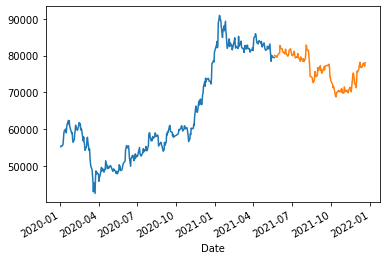

In [8]:
y_train = ss['Close'][:int(0.7*len(ss))]
y_test = ss['Close'][int(0.7*len(ss)):]

y_train.plot()
y_test.plot()


## pmdarima.arima.auto_arima

pmdarima.arima.auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)

In [46]:
from pmdarima.arima import auto_arima

In [50]:
model = auto_arima(y= y_train, 
                d=1,
                start_p = 0,
                max_p = 3,
                start_q =0,
                max_q = 3,
                seasonal=False,
                stepwise=True,
                trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5810.372, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5812.313, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5812.329, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5809.562, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5814.327, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.272 seconds


In [51]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [53]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  342
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2903.781
Date:                Mon, 25 Jul 2022   AIC                           5809.562
Time:                        10:52:55   BIC                           5813.394
Sample:                             0   HQIC                          5811.089
                                - 342                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.454e+06   7.85e+04     18.522      0.000     1.3e+06    1.61e+06
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                67.84
Prob(Q):                              0.88   Pr

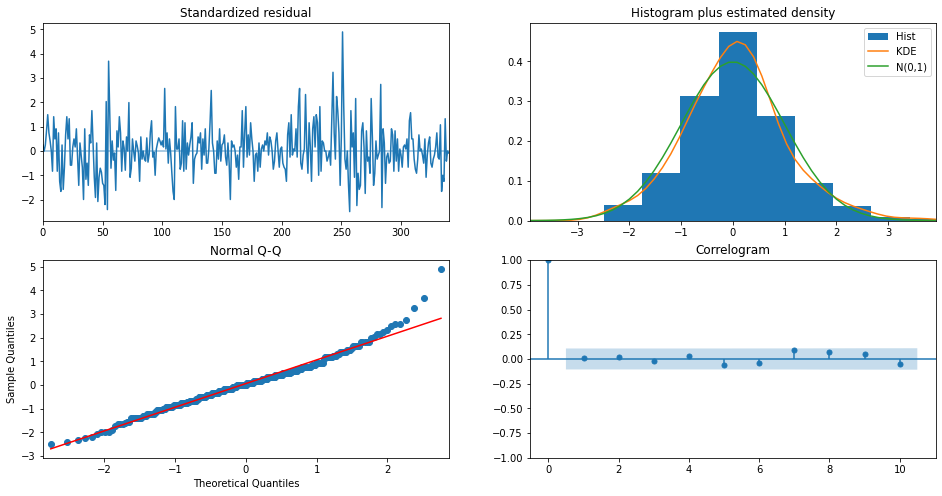

In [55]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

### 예측

In [67]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])
y_predict

,Prediction
Date,
2021-05-21,79500.0
2021-05-24,79500.0
2021-05-25,79500.0
2021-05-26,79500.0
2021-05-27,79500.0
...,...
2021-12-15,79500.0
2021-12-16,79500.0
2021-12-17,79500.0


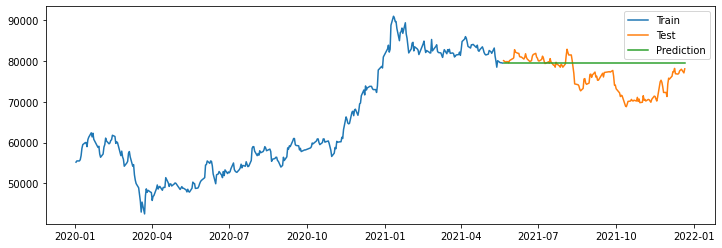

In [65]:


# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()